In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/introvert-vs-extrovert-prediction/train.csv
/kaggle/input/introvert-vs-extrovert-prediction/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Handle missing values**

In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/introvert-vs-extrovert-prediction/train.csv')

print(df.isnull().sum())

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [4]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
#Stage_fear,Drained_after_socializing =>categorical
#Personality=>target

In [7]:
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [8]:
print(df.max(numeric_only=True))

id                         18523.0
Time_spent_Alone              11.0
Social_event_attendance       10.0
Going_outside                  7.0
Friends_circle_size           15.0
Post_frequency                10.0
dtype: float64


In [9]:
print(df.min(numeric_only=True))

id                         0.0
Time_spent_Alone           0.0
Social_event_attendance    0.0
Going_outside              0.0
Friends_circle_size        0.0
Post_frequency             0.0
dtype: float64


In [10]:
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)

In [11]:
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,2.0,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [12]:
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)

In [13]:
print(df.isnull().sum())

id                              0
Time_spent_Alone                0
Stage_fear                   1893
Social_event_attendance         0
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [14]:
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)

In [15]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [16]:
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)

In [17]:
print(df.isnull().sum())

id                              0
Time_spent_Alone                0
Stage_fear                      0
Social_event_attendance         0
Going_outside                1466
Drained_after_socializing       0
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [18]:
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)

In [19]:
df['Going_outside'].fillna(df['Going_outside'].median(), inplace=True)

In [20]:
df['Post_frequency'].fillna(df['Post_frequency'].mean(), inplace=True)

In [21]:
print(df.isnull().sum())

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


# Outliers 

# **Using the IQR (Interquartile Range) Method**

In [22]:
Q1 = df['Time_spent_Alone'].quantile(0.25)
Q3 = df['Time_spent_Alone'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Time_spent_Alone'] < lower_bound) | (df['Time_spent_Alone'] > upper_bound)]
print(outliers)

          id  Time_spent_Alone Stage_fear  Social_event_attendance  \
25        25               9.0        Yes                      1.0   
27        27               9.0         No                      0.0   
44        44               9.0        Yes                      1.0   
48        48              10.0        Yes                      1.0   
55        55               9.0        Yes                      0.0   
...      ...               ...        ...                      ...   
18441  18441              10.0         No                      3.0   
18448  18448              11.0        Yes                      1.0   
18449  18449               9.0        Yes                      2.0   
18459  18459              11.0        Yes                      1.0   
18501  18501              10.0        Yes                      2.0   

       Going_outside Drained_after_socializing  Friends_circle_size  \
25               3.0                       Yes                  7.0   
27               

# Using Z-score

In [23]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Time_spent_Alone']))
outliers = df[z_scores > 3]  
print(outliers)


Empty DataFrame
Columns: [id, Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []


# Using Boxplot

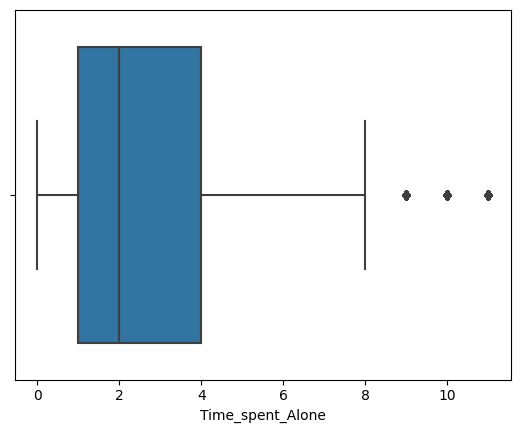

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Time_spent_Alone'])
plt.show()


In [25]:
df = df[~((df['Time_spent_Alone'] < lower_bound) | (df['Time_spent_Alone'] > upper_bound))]

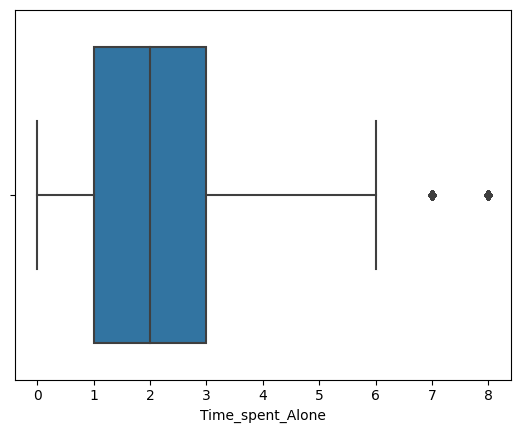

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Time_spent_Alone'])
plt.show()

In [27]:
Q1 = df['Time_spent_Alone'].quantile(0.25)
Q3 = df['Time_spent_Alone'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Time_spent_Alone'] = df['Time_spent_Alone'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


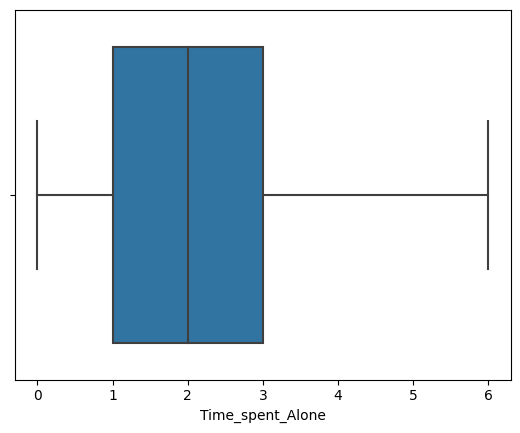

In [28]:
sns.boxplot(x=df['Time_spent_Alone'])
plt.show()

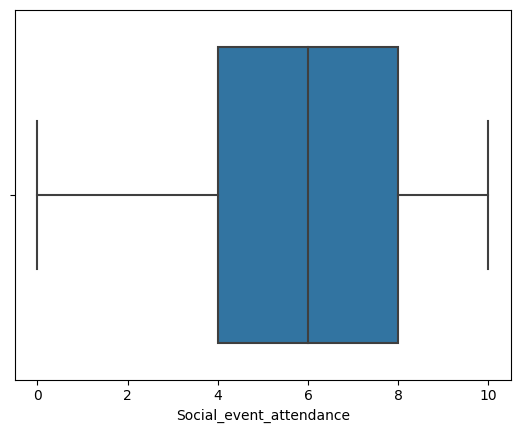

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Social_event_attendance'])
plt.show()

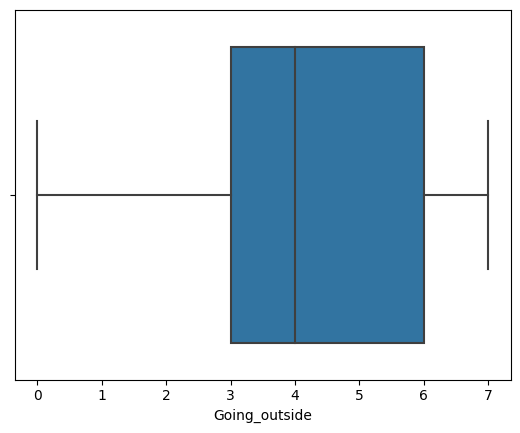

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Going_outside'])
plt.show()

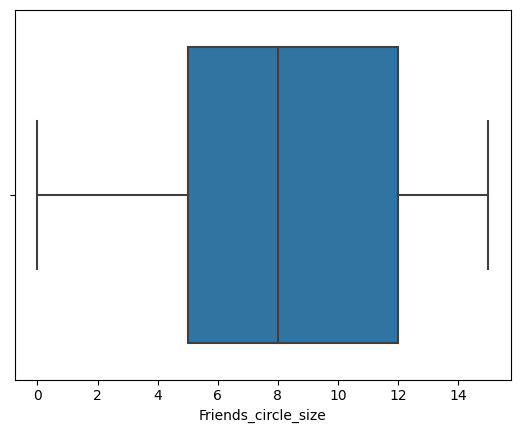

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Friends_circle_size'])
plt.show()

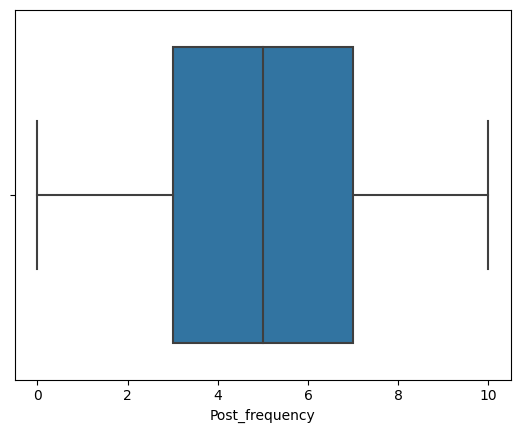

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Post_frequency'])
plt.show()

# Encoding

# Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Stage_fear'] = le.fit_transform(df['Stage_fear']) 


In [34]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,No,15.0,5.000000,Extrovert
1,1,1.0,0,7.0,3.0,No,10.0,8.000000,Extrovert
2,2,6.0,1,1.0,0.0,No,3.0,0.000000,Introvert
3,3,3.0,0,7.0,3.0,No,11.0,5.000000,Extrovert
4,4,1.0,0,4.0,4.0,No,13.0,4.982097,Extrovert


In [35]:
le = LabelEncoder()
df['Drained_after_socializing'] = le.fit_transform(df['Drained_after_socializing']) 

In [36]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.000000,Extrovert
1,1,1.0,0,7.0,3.0,0,10.0,8.000000,Extrovert
2,2,6.0,1,1.0,0.0,0,3.0,0.000000,Introvert
3,3,3.0,0,7.0,3.0,0,11.0,5.000000,Extrovert
4,4,1.0,0,4.0,4.0,0,13.0,4.982097,Extrovert


In [37]:
print(df['Social_event_attendance'].value_counts())

Social_event_attendance
9.000000     2060
4.000000     2050
7.000000     2027
6.000000     1979
5.000000     1973
8.000000     1938
3.000000     1307
5.265106     1031
0.000000      703
2.000000      698
1.000000      642
10.000000     463
Name: count, dtype: int64


In [38]:
df['Social_event_attendance'] = df['Social_event_attendance'].round().astype(int)

In [39]:
print(df['Social_event_attendance'].value_counts())

Social_event_attendance
5     3004
9     2060
4     2050
7     2027
6     1979
8     1938
3     1307
0      703
2      698
1      642
10     463
Name: count, dtype: int64


In [40]:
df['Social_event_attendance_level'] = pd.cut(
    df['Social_event_attendance'],
    bins=[-1, 3, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Ordinal Encoding

In [41]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Social_event_attendance_level'] = oe.fit_transform(df[['Social_event_attendance_level']])


In [42]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_event_attendance_level
0,0,0.0,0,6,4.0,0,15.0,5.000000,Extrovert,1.0
1,1,1.0,0,7,3.0,0,10.0,8.000000,Extrovert,2.0
2,2,6.0,1,1,0.0,0,3.0,0.000000,Introvert,0.0
3,3,3.0,0,7,3.0,0,11.0,5.000000,Extrovert,2.0
4,4,1.0,0,4,4.0,0,13.0,4.982097,Extrovert,1.0


In [43]:
print(df['Time_spent_Alone'].value_counts())

Time_spent_Alone
2.0    4229
0.0    3139
3.0    3081
1.0    2973
6.0    1737
4.0    1079
5.0     633
Name: count, dtype: int64


In [44]:
print(df['Time_spent_Alone'].unique())


[0. 1. 6. 3. 2. 4. 5.]


In [45]:
df['Alone_Time_Level'] = pd.cut(
    df['Time_spent_Alone'],
    bins=[-1, 1, 3, 6],
    labels=['Low', 'Medium', 'High']
)

In [46]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Alone_Time_Level'] = oe.fit_transform(df[['Alone_Time_Level']])


In [47]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_event_attendance_level,Alone_Time_Level
0,0,0.0,0,6,4.0,0,15.0,5.000000,Extrovert,1.0,0.0
1,1,1.0,0,7,3.0,0,10.0,8.000000,Extrovert,2.0,0.0
2,2,6.0,1,1,0.0,0,3.0,0.000000,Introvert,0.0,2.0
3,3,3.0,0,7,3.0,0,11.0,5.000000,Extrovert,2.0,1.0
4,4,1.0,0,4,4.0,0,13.0,4.982097,Extrovert,1.0,0.0


In [48]:
print(df['Going_outside'].value_counts())

Going_outside
4.0    3979
5.0    2912
6.0    2697
3.0    2636
7.0    2167
0.0     868
2.0     850
1.0     762
Name: count, dtype: int64


In [49]:
print(df['Friends_circle_size'].value_counts())

Friends_circle_size
5.000000     1417
12.000000    1316
8.000000     1273
10.000000    1259
11.000000    1251
14.000000    1187
6.000000     1134
7.000000     1114
9.000000     1060
4.000000     1049
13.000000    1046
15.000000     941
7.996737      929
3.000000      588
2.000000      507
1.000000      489
0.000000      311
Name: count, dtype: int64


In [50]:
#This is not a categorical column.

#One-hot encoding would create 16+ columns unnecessarily.

In [51]:
df['Friends_circle_size'] = df['Friends_circle_size'].round().astype(int)

In [52]:
print(df['Friends_circle_size'].value_counts())

Friends_circle_size
8     2202
5     1417
12    1316
10    1259
11    1251
14    1187
6     1134
7     1114
9     1060
4     1049
13    1046
15     941
3      588
2      507
1      489
0      311
Name: count, dtype: int64


In [53]:
print(df['Post_frequency'].value_counts())

Post_frequency
3.000000     2074
7.000000     1825
5.000000     1780
6.000000     1758
9.000000     1740
8.000000     1733
4.000000     1675
4.982097     1097
2.000000      877
0.000000      845
1.000000      790
10.000000     677
Name: count, dtype: int64


In [54]:
df['Post_frequency'] = df['Post_frequency'].round().astype(int)

In [55]:
print(df['Post_frequency'].value_counts())

Post_frequency
5     2877
3     2074
7     1825
6     1758
9     1740
8     1733
4     1675
2      877
0      845
1      790
10     677
Name: count, dtype: int64


In [56]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_event_attendance_level,Alone_Time_Level
0,0,0.0,0,6,4.0,0,15,5,Extrovert,1.0,0.0
1,1,1.0,0,7,3.0,0,10,8,Extrovert,2.0,0.0
2,2,6.0,1,1,0.0,0,3,0,Introvert,0.0,2.0
3,3,3.0,0,7,3.0,0,11,5,Extrovert,2.0,1.0
4,4,1.0,0,4,4.0,0,13,5,Extrovert,1.0,0.0


In [57]:
print(df['Social_event_attendance_level'].head())

0    1.0
1    2.0
2    0.0
3    2.0
4    1.0
Name: Social_event_attendance_level, dtype: float64


In [58]:
print(df['Alone_Time_Level'].head())

0    0.0
1    0.0
2    2.0
3    1.0
4    0.0
Name: Alone_Time_Level, dtype: float64


# Feature Engineering 

In [59]:
df.drop(columns=['id', 'Alone_Time_Level','Social_event_attendance_level'], inplace=True, errors='ignore')  # adjust column names as needed


In [60]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,6,4.0,0,15,5,Extrovert
1,1.0,0,7,3.0,0,10,8,Extrovert
2,6.0,1,1,0.0,0,3,0,Introvert
3,3.0,0,7,3.0,0,11,5,Extrovert
4,1.0,0,4,4.0,0,13,5,Extrovert


 # Create a New Feature

In [61]:
#More going outside + more friends – more time alone → higher engagement

In [62]:
df['Social_Engagement_Score'] = (
    df['Going_outside'] + df['Friends_circle_size'] - df['Time_spent_Alone']
)

In [63]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Social_Engagement_Score
0,0.0,0,6,4.0,0,15,5,Extrovert,19.0
1,1.0,0,7,3.0,0,10,8,Extrovert,12.0
2,6.0,1,1,0.0,0,3,0,Introvert,-3.0
3,3.0,0,7,3.0,0,11,5,Extrovert,11.0
4,1.0,0,4,4.0,0,13,5,Extrovert,16.0


In [64]:
df[['Social_Engagement_Score','Personality']].head(10)

,Social_Engagement_Score,Personality
0,19.0,Extrovert
1,12.0,Extrovert
2,-3.0,Introvert
3,11.0,Extrovert
4,16.0,Extrovert
5,11.0,Extrovert
6,11.0,Extrovert
7,5.0,Extrovert
8,-3.0,Introvert
9,19.0,Extrovert
